In [1]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
import h5py

import pickle
import tqdm
import time
import math

from random import choice

In [2]:
f = h5py.File('first_sample.hdf5','r')

print(f.keys())
print(f['data'].attrs.keys())
print(f['data'].attrs['title'])
print(f['data'].attrs['descr'])
print(f['data'].attrs['columns'])

rawdata = np.copy(f['data'])
f.close()

<KeysViewHDF5 ['data']>
<KeysViewHDF5 ['N', 'columns', 'descr', 'title']>
First fake dataset
Here is where we can leave notes on how we made the data set...
0-2047: wavenumber, 2048-4095: flux, z, Nar_fwhm, BLR_fwhm, BLR_fl,Nar_fl,NII_fl,Cont,Type


In [3]:
rawdata.shape

(10000, 4104)

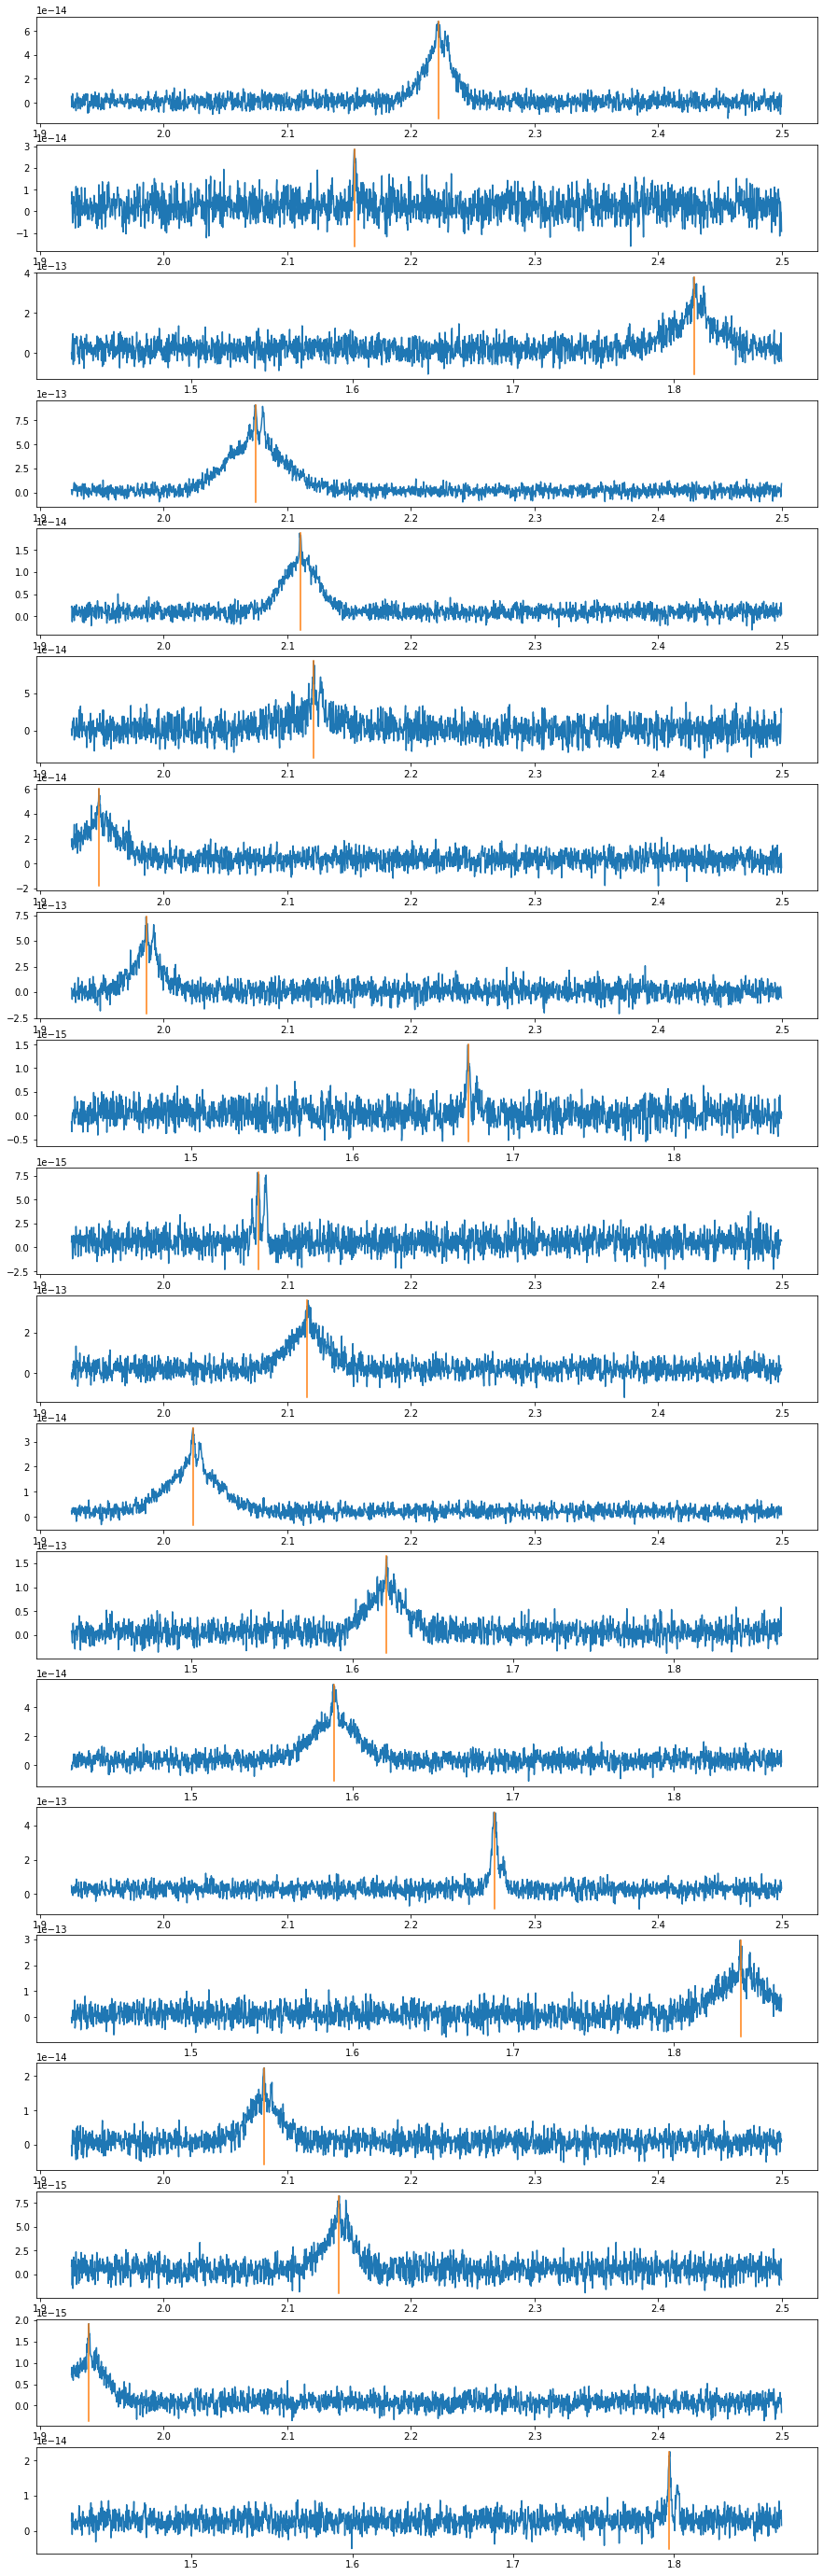

In [4]:
toshow = 20
offset = 0
plt.figure(figsize=(15,2.5*toshow))
for i in range(toshow):
    plt.subplot(toshow,1,i+1)
    x = rawdata[i+offset][   0:2048]
    y = rawdata[i+offset][2048:4096]
    plt.plot(x,y)
    opz = 1 + rawdata[i+offset][4096]
    guess = 6562.8/1e4*opz
    plt.plot([guess,guess],[np.min(y),np.max(y)])
plt.show()